In [160]:
# dataset 불러오기
import pandas as pd
import numpy as np
import matplotlib as plt
# jupyter에서 matplotlib의 결과를 아래 바로 보이게 하기 위해 %matplotlib inline을 입력합니다.
%matplotlib inline

# 다운로드 받은 데이터를 pandas의 dataframe형태로 읽어옵니다.
df = pd.read_csv("/media/ssd/projects/python/Aries/DataGenerator/performance.csv")

In [161]:
df.head(10)

,current_task_package,wakelock_power_mah,sreclaimable,cpu_power_mah,level,cached,gpu_busy,total_power,timestamp_milli,vfps_ratio,mobile_tx,adc_vts,memfree,wifi_rx,app_launch_time,sunreclaim,mobile_rx,wifi_tx,adc_pa_therm0,adc_pa_therm1
0,com.kakao.talk,23.790350,0,333.334710,0,0,0,167695.873772,1466676482723,0,39258,0,0,1126,0,0,48370,945,0,0
1,com.kakao.talk,23.790350,66788,333.334710,0,1062132,0,167695.873772,1466676483088,0,0,0,90540,0,0,133980,0,0,0,0
2,com.kakao.talk,23.790357,66788,333.526037,0,1062132,0,167759.241788,1466676485715,0,1,0,90540,0,0,133980,1,0,0,0
3,com.kakao.talk,23.790357,66788,333.526037,0,1063056,0,167759.241788,1466676486268,0,0,0,82504,0,0,133960,0,0,0,0
4,com.kakao.talk,23.790357,66788,333.576546,0,1063056,0,167772.587883,1466676486290,0,9,0,82504,0,0,133960,8,0,0,0
5,com.kakao.talk,23.790357,66788,333.576546,0,1063584,0,167772.587883,1466676486610,0,0,0,76508,0,0,133960,0,0,0,0
6,com.kakao.talk,23.790357,66788,333.576546,56,1063584,0,167772.587883,1466676487933,0,0,0,76508,0,0,133960,0,0,0,0
7,com.kakao.talk,23.790350,66788,333.675433,56,1063584,0,167806.479975,1466676487933,0,8,0,76508,0,0,133960,8,0,0,0
8,com.kakao.talk,23.790350,66788,333.675433,56,1063584,0,167806.479975,1466676488282,0,0,323,76508,0,0,133960,0,0,0,0
9,com.kakao.talk,23.790350,66788,333.675433,56,1063584,0,167806.479975,1466676488311,0,0,323,76508,0,0,133960,0,0,28,0


In [164]:
import datetime 
df['timestamp_milli'] = df['timestamp_milli'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
df = df.set_index(['timestamp_milli']) 
#datetime.datetime.fromtimestamp(df['timestamp_milli'][0]/1000)
#df['timestamp_milli'] = datetime.datetime.fromtimestamp(df['timestamp_milli']/1000)
#df = df.set_index(['timestamp_milli'])

KeyError: 'timestamp_milli'

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f87c8ee1810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f87c8e01790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f87c8d49510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f87c8d86c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f87c8efc290>,
  <matplotlib.lines.Line2D at 0x7f87c8eb2ad0>]}

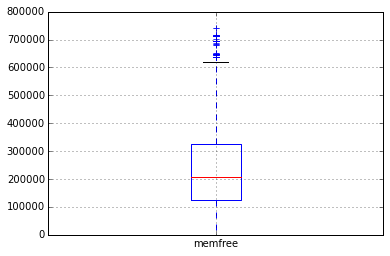

In [163]:
df.boxplot(column='memfree')#, by = 'Education')

In [176]:
df['current_task_package'].value_counts()

com.kakao.talk                1208
com.buzzpia.aqua.launcher      874
com.facebook.katana            426
com.android.systemui           351
com.android.incallui           108
sixclk.newpiki                  81
com.android.chrome              69
com.hyundaicard.appcard         65
kr.co.emart.emartmall           35
com.android.mms                 24
net.daum.android.webtoon        19
com.kakao.story                 15
com.lge.lockscreensettings      14
com.android.contacts            13
com.android.settings             5
com.socialapps.homeplus          4
com.lge.ime                      2
android                          1
Name: current_task_package, dtype: int64

In [173]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

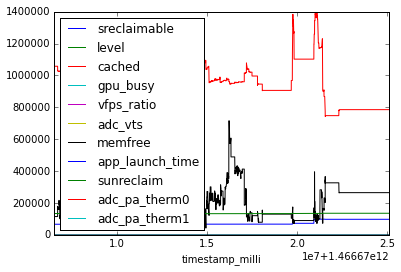

In [313]:
df.plot()

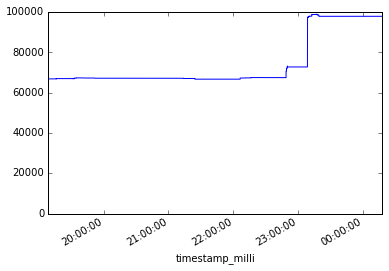

In [157]:
df['sreclaimable'].plot()

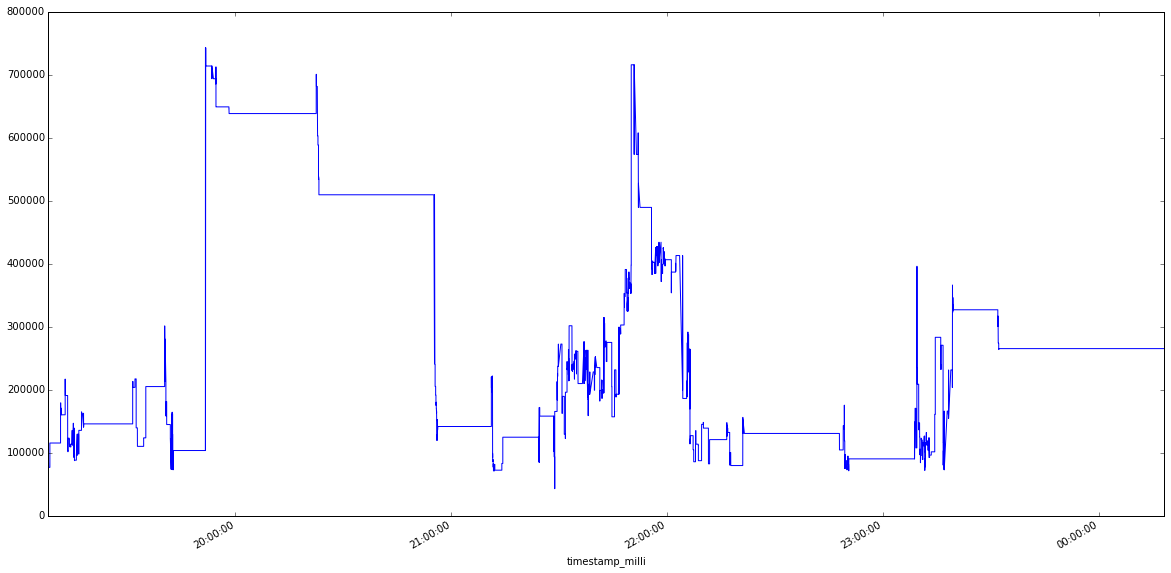

In [159]:
df['memfree'].plot(figsize=(20,10))

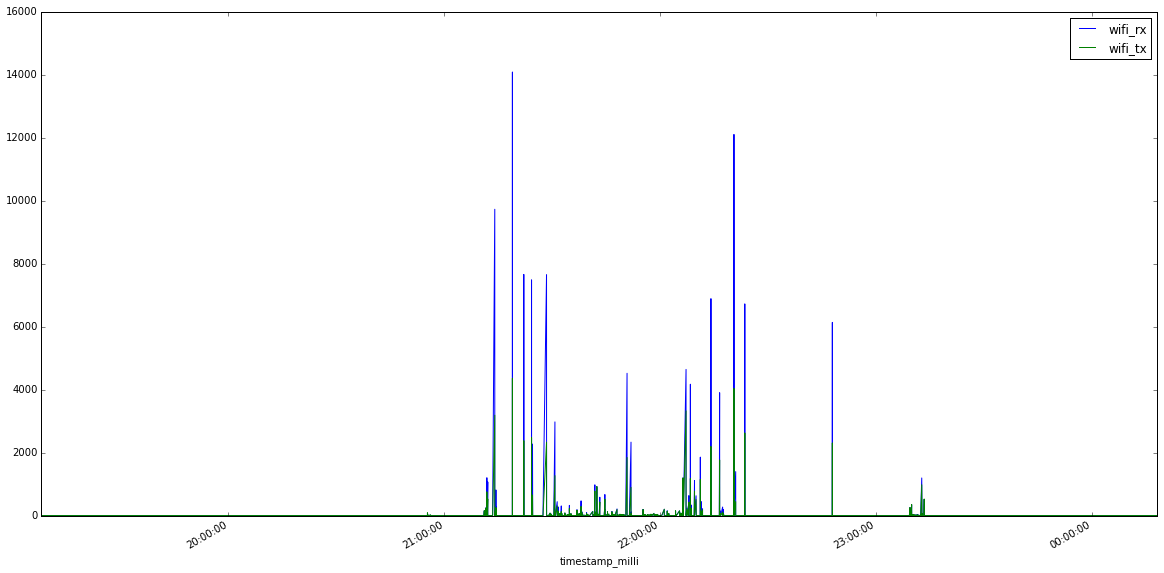

In [140]:
df[['wifi_rx','wifi_tx']].plot(figsize=(20,10))

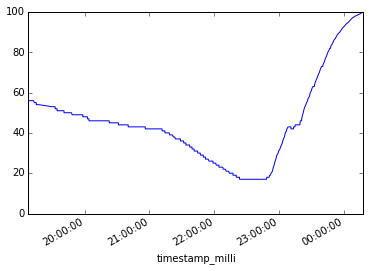

In [141]:
df['level'].plot()

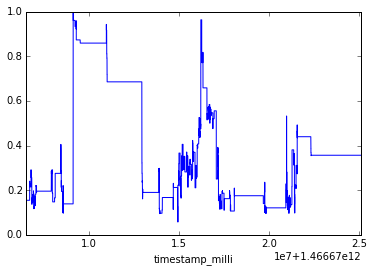

In [93]:
# min, max normalization 
df_norm = (df - df.min()) / (df.max()-df.min())
df_norm['memfree'].plot()

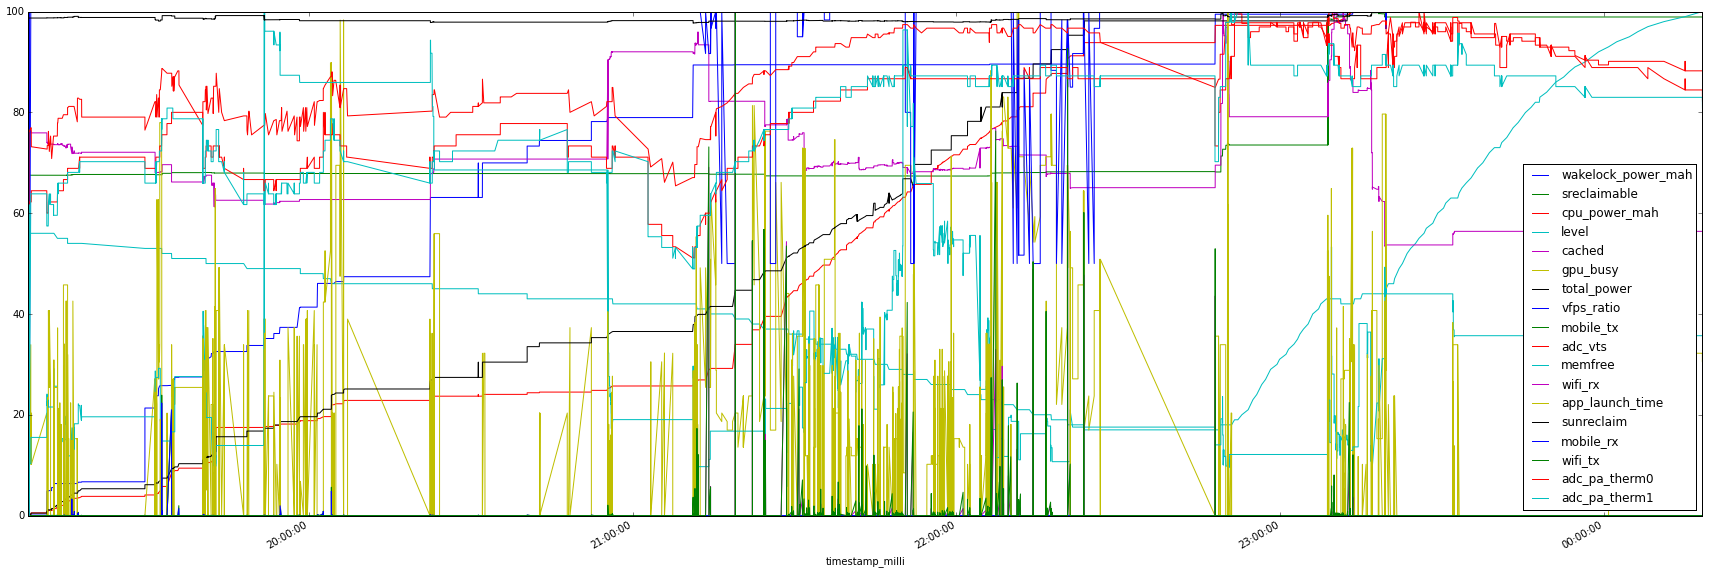

In [144]:
# min, max normalization 
df_norm = (df - df.min()) / (df.max()-df.min()) 

# range normalization [x, y] ex) [0, 100]
y = 100
x = 0
range = y - x
normalized_df = (df_norm * range) + x
normalized_df.plot(legend=True, figsize=(30,10))

AttributeError: 'module' object has no attribute 'plot'

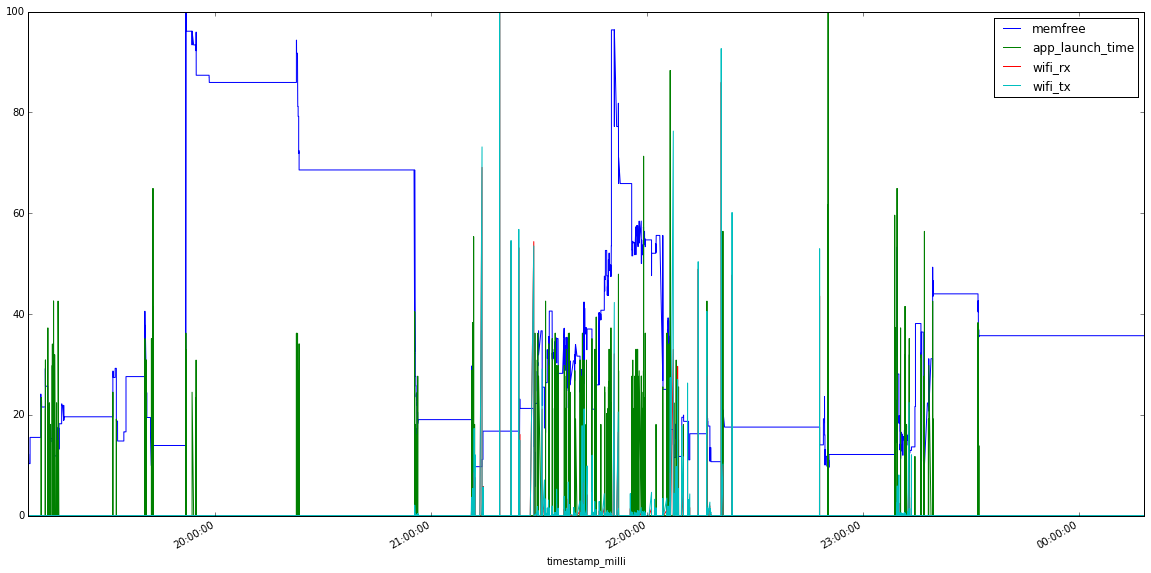

In [156]:
normalized_df[['memfree','app_launch_time','wifi_rx', 'wifi_tx']].plot(kind='line', figsize=(20,10)) 

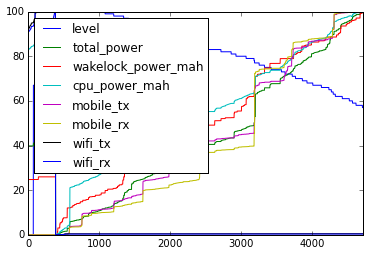

In [30]:
normalized_df[['level', 'total_power','wakelock_power_mah','cpu_power_mah','mobile_tx','mobile_rx', 'wifi_tx','wifi_rx']].plot(legend='top')

In [ ]:
normalized_df[['memfree', 'wifi_rx','wifi_tx', 'mobile_rx','mobile_tx']].plot()

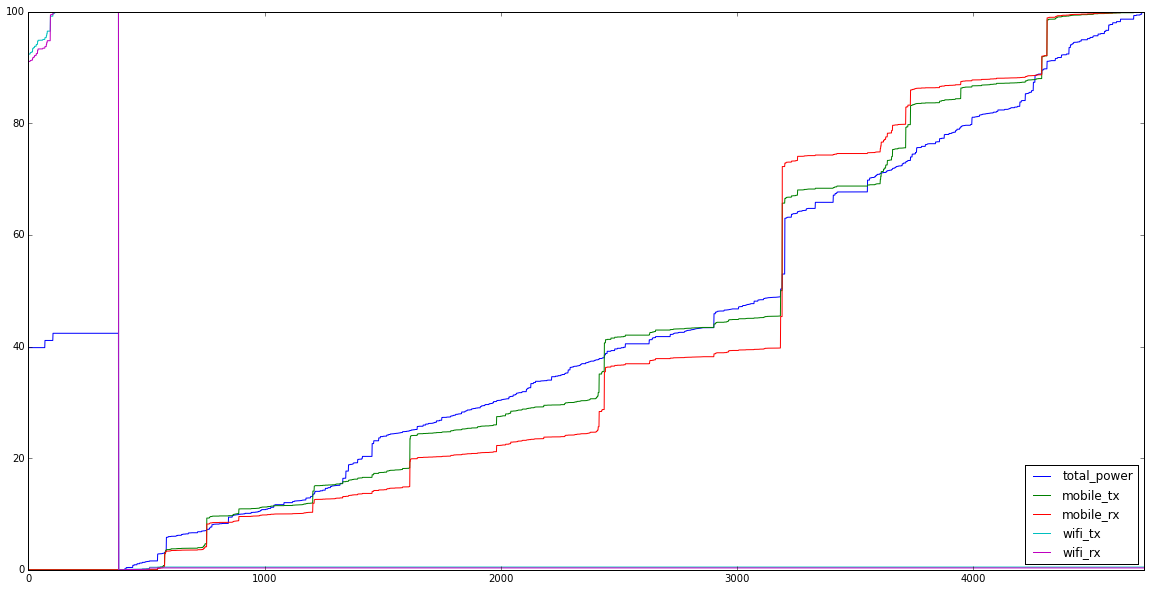

In [40]:
normalized_df[['total_power','mobile_tx','mobile_rx','wifi_tx','wifi_rx']].plot(figsize=(20,10))

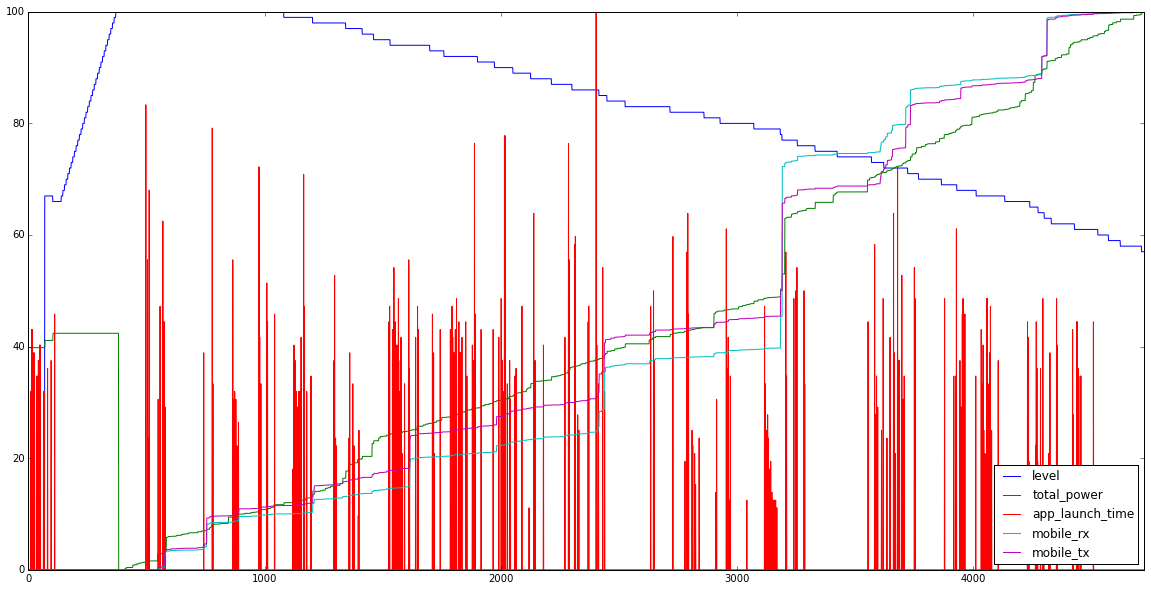

In [58]:
normalized_df[['level','total_power','app_launch_time','mobile_rx','mobile_tx']].plot(figsize=(20,10))

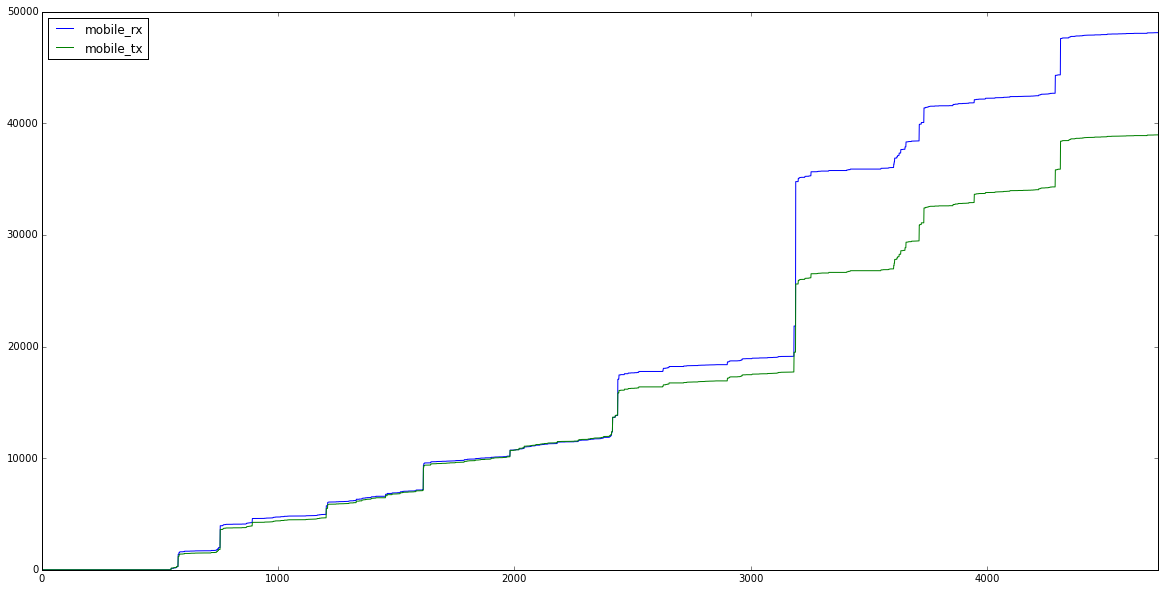

In [81]:
    df[['mobile_rx','mobile_tx']].plot(figsize=(20,10))

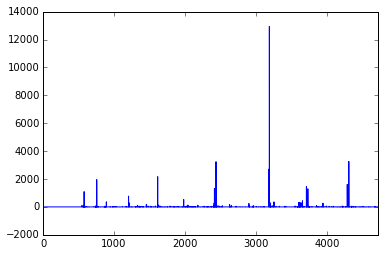

In [70]:
(df['mobile_rx'] - df['mobile_rx'].shift(periods=1)).plot()

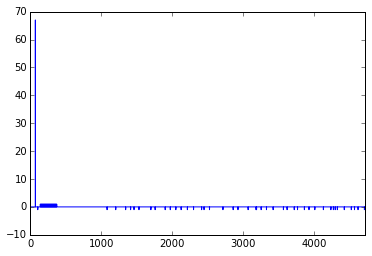

In [72]:
(df['level'] - df['level'].shift(periods=1)).plot()

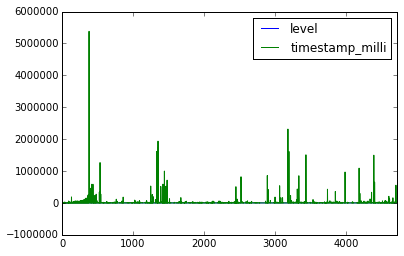

In [79]:
(df[['level','timestamp_milli']].shift(periods=0) - df[['level','timestamp_milli']].shift(periods=1)).plot()

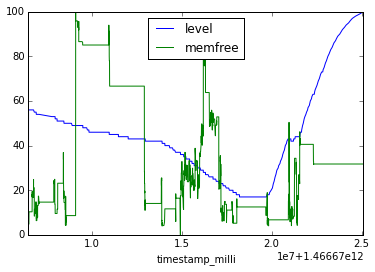

In [320]:
normalized_df[['level','memfree']].plot()

In [1]:
tplotlib as plt
# jupyter에서 matplotlib의 결과를 아래 바로 보이게 하기 위해 %matplotlib inline을 입력합니다.
%matplotlib inline

# 다운로드 받은 데이터를 pandas의 dataframe형태로 읽어옵니다.
df = pd.read_csv("/home/cluster/Desktop/train_u6lujuX_CVtuZ9i.csv")df['app_launch_time'].plot()

SyntaxError: invalid syntax (<ipython-input-1-ca54e3044419>, line 1)

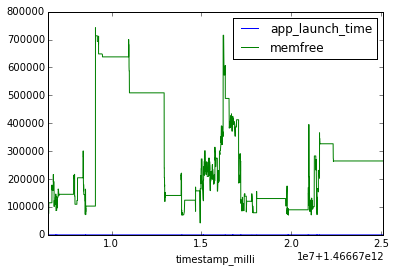

In [222]:
df[['app_launch_time', 'memfree']].plot()

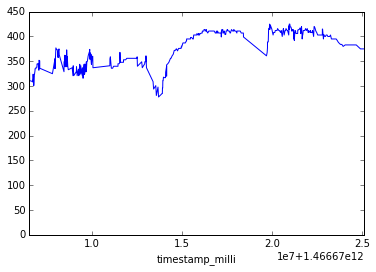

In [256]:
df['adc_vts'].plot()

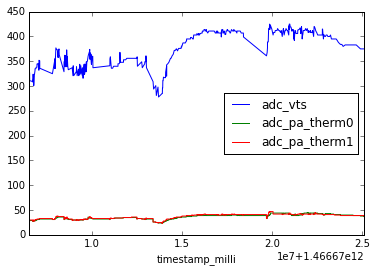

In [259]:
df[['adc_vts','adc_pa_therm0','adc_pa_therm1']].plot()

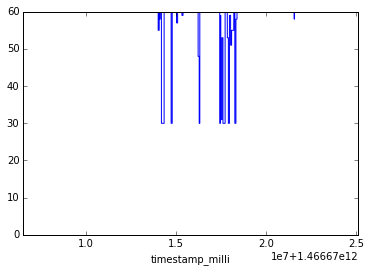

In [260]:
df['vfps_ratio'].plot()

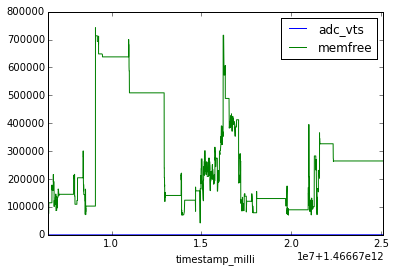

In [225]:
df[['adc_vts', 'memfree']].plot()

In [106]:
# z-score normalization
df_norm = (df-df.mean())/df.std()

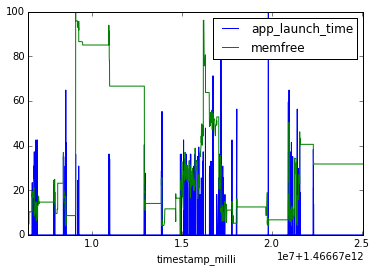

In [236]:
normalized_df[['app_launch_time','memfree']].plot()

In [65]:
alt_df = df[df['app_launch_time']!=0]['app_launch_time']

In [66]:
alt_df_norm = (alt_df-alt_df.mean())/(alt_df.max()-alt_df.min()).mean()

In [69]:
df_norm['app_launch_time'] = alt_df_norm

In [98]:
max = df['app_launch_time'].max()
min = df['app_launch_time'].min()
avg = df[df['app_launch_time']!=0]['app_launch_time'].mean()
std = df[df['app_launch_time']!=0]['app_launch_time'].std()

In [99]:
print max, min , avg, std

940 0 279.230769231 122.357789174


In [87]:
df_norm['app_launch_time'] = (df-avg)/(max-min).mean()

In [96]:
df.describe()

,sreclaimable,cached,memfree,app_launch_time,sunreclaim
count,622.000000,6.220000e+02,622.000000,622.000000,622.000000
mean,72193.942122,1.040715e+06,240355.614148,75.868167,133629.819936
std,11524.816847,1.541519e+05,145947.495815,139.656129,772.922000
min,66628.000000,7.441600e+05,42720.000000,0.000000,132616.000000
25%,66656.000000,9.563500e+05,123851.000000,0.000000,133118.000000
50%,66784.000000,9.756660e+05,208680.000000,0.000000,133280.000000
75%,67308.000000,1.076651e+06,334388.000000,150.000000,134132.000000
max,98908.000000,1.393192e+06,742540.000000,940.000000,135728.000000


In [107]:
df_norm['app_launch_time'] = (df['app_launch_time'] - avg) / std

In [108]:
df_norm.head(10)

,sreclaimable,cached,memfree,app_launch_time,sunreclaim
timestamp_milli,,,,,
1466676483088,-0.469070,0.138936,-1.026503,-2.282084,0.453060
1466676486268,-0.469070,0.144930,-1.081564,-2.282084,0.427184
1466676486610,-0.469070,0.148355,-1.122648,-2.282084,0.427184
1466676509657,-0.469417,0.110833,-0.858087,-2.282084,0.458235
1466676687959,-0.469417,-0.066628,-0.421190,-2.282084,0.546213
1466676691174,-0.469417,-0.061153,-0.497793,-2.282084,0.515162
1466676691953,-0.469417,-0.057780,-0.538547,-2.282084,0.535863
1466676694558,-0.469417,-0.057780,-0.538547,-0.484078,0.535863
1466676694622,-0.469417,-0.064267,-0.480115,-2.282084,0.535863


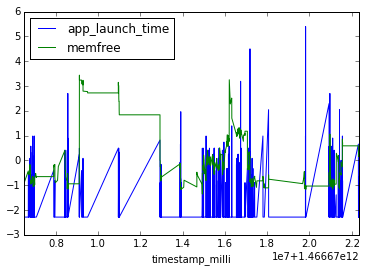

In [142]:
df_norm[['app_launch_time','memfree']].plot()

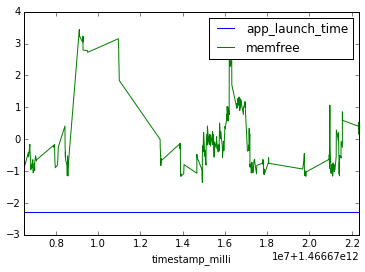

In [144]:
df_norm[df_norm['app_launch_time']+2.282084 < 0.0001][['app_launch_time','memfree']].plot()

In [324]:
df_norm.head(3)

,sreclaimable,level,cached,gpu_busy,vfps_ratio,adc_vts,memfree,app_launch_time,sunreclaim,adc_pa_therm0,adc_pa_therm1
timestamp_milli,,,,,,,,,,,
1466676483088,0.004957,0.0,0.489917,0.0,0.0,0.0,0.068332,0.0,0.438303,0.0,0.0
1466676486268,0.004957,0.0,0.491341,0.0,0.0,0.0,0.056849,0.0,0.431877,0.0,0.0
1466676486610,0.004957,0.0,0.492154,0.0,0.0,0.0,0.048281,0.0,0.431877,0.0,0.0


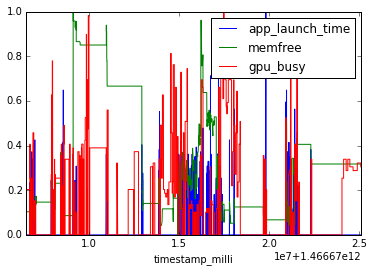

In [336]:
df_norm[['app_launch_time','memfree', 'gpu_busy']].plot()

In [360]:
print (df['app_launch_time'] / 1000).describe()
print df['app_launch_time'].describe()

count    2126.000000
mean        0.022197
std         0.083016
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.940000
Name: app_launch_time, dtype: float64
count    2126.000000
mean       22.196613
std        83.015638
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       940.000000
Name: app_launch_time, dtype: float64


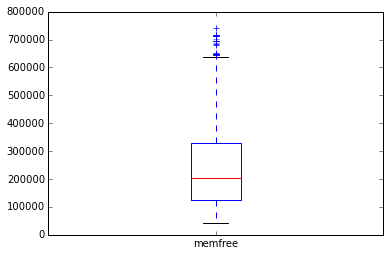

In [363]:
df['memfree'].plot(kind='box')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7fe7558f4c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe755b4f4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe755b62110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe755b4fcd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe7558a8a90>,
  <matplotlib.lines.Line2D at 0x7fe7558f4a50>]}

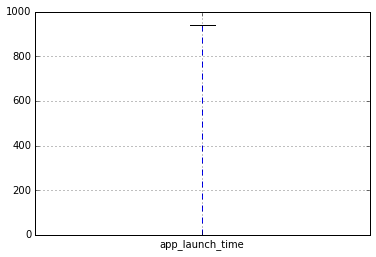

In [362]:
df.boxplot(column='app_launch_time')#, by = 'Education')

In [48]:
def correlation_matrix(df):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    # plt.title('Abalone Feature Correlation')
    labels= df.columns.tolist() #['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

# correlation_matrix(df)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


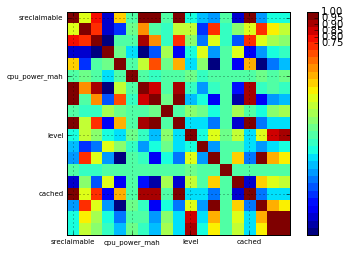

In [49]:
correlation_matrix(normalized_df)

In [50]:
normalized_df.corr()

,wakelock_power_mah,sreclaimable,cpu_power_mah,level,cached,gpu_busy,total_power,timestamp_milli,vfps_ratio,mobile_tx,adc_vts,memfree,wifi_rx,app_launch_time,sunreclaim,mobile_rx,wifi_tx,adc_pa_therm0,adc_pa_therm1
wakelock_power_mah,1.000000,0.329259,0.814301,-0.647577,0.453680,0.000820,0.963178,0.940819,0.021783,0.979603,-0.097849,-0.207832,-0.270947,-0.005572,-0.653522,0.973279,-0.270833,-0.126499,-0.118115
sreclaimable,0.329259,1.000000,0.735757,-0.635329,-0.466900,0.067861,0.537122,0.024470,-0.028252,0.250179,0.253017,-0.443520,0.733055,-0.027476,0.102019,0.288409,0.733077,0.372875,0.269355
cpu_power_mah,0.814301,0.735757,1.000000,-0.800828,-0.013172,0.016914,0.924104,0.577913,-0.043862,0.738858,0.131481,-0.326364,0.321788,-0.021263,-0.394726,0.743778,0.321973,0.200293,0.144371
level,-0.647577,-0.635329,-0.800828,1.000000,0.096160,-0.159920,-0.751386,-0.440431,0.185535,-0.596317,-0.111444,0.299047,-0.277712,-0.019113,0.325372,-0.604173,-0.281281,-0.111670,-0.079249
cached,0.453680,-0.466900,-0.013172,0.096160,1.000000,-0.006782,0.232976,0.646291,0.099396,0.476489,-0.186018,0.129637,-0.770672,0.038390,-0.581580,0.459756,-0.770588,-0.345746,-0.256419
gpu_busy,0.000820,0.067861,0.016914,-0.159920,-0.006782,1.000000,0.011182,-0.020952,-0.014004,0.000887,0.082837,-0.049948,0.039274,0.025346,0.020095,0.009305,0.041416,0.011442,0.074570
total_power,0.963178,0.537122,0.924104,-0.751386,0.232976,0.011182,1.000000,0.826535,-0.006752,0.934233,-0.025277,-0.290175,-0.031435,-0.016558,-0.554723,0.936770,-0.031333,-0.007003,-0.029673
timestamp_milli,0.940819,0.024470,0.577913,-0.440431,0.646291,-0.020952,0.826535,1.000000,0.060369,0.956625,-0.207236,-0.101953,-0.573631,0.000584,-0.690291,0.939731,-0.573666,-0.283350,-0.238701
vfps_ratio,0.021783,-0.028252,-0.043862,0.185535,0.099396,-0.014004,-0.006752,0.060369,1.000000,0.032249,0.119493,0.055678,-0.106931,0.006064,0.219281,0.029130,-0.108230,0.134789,0.196470
mobile_tx,0.979603,0.250179,0.738858,-0.596317,0.476489,0.000887,0.934233,0.956625,0.032249,1.000000,-0.141470,-0.163713,-0.375735,-0.012608,-0.653145,0.995618,-0.375658,-0.178461,-0.160772


In [304]:
normalized_df['vfps_ratio'].head(10)

timestamp_milli
1466676483088      0.0
1466676486268      0.0
1466676486610      0.0
1466676488282      0.0
1466676488311      0.0
1466676488337      0.0
1466676488412    100.0
1466676507940    100.0
1466676507973    100.0
1466676508001    100.0
Name: vfps_ratio, dtype: float64

In [307]:
df['vfps_ratio'].head(70)

timestamp_milli
1466676483088     0
1466676486268     0
1466676486610     0
1466676488282     0
1466676488311     0
1466676488337     0
1466676488412    60
1466676507940    60
1466676507973    60
1466676508001    60
1466676508069    60
1466676509657    60
1466676514105    60
1466676514132    60
1466676514164    60
1466676514248    60
1466676686107    60
1466676686139    60
1466676686166    60
1466676686241    60
1466676687959    60
1466676691086    60
1466676691152    60
1466676691174    60
1466676691196    60
1466676691279    60
1466676691953    60
1466676694558    60
1466676694622    60
1466676700786    60
                 ..
1466676714362    60
1466676714468    60
1466676728776    60
1466676728802    60
1466676728826    60
1466676728904    60
1466676739700    60
1466676739732    60
1466676739771    60
1466676739845    60
1466676761860    60
1466676761890    60
1466676761919    60
1466676761995    60
1466676764157    60
1466676764221    60
1466676765847    60
1466676765925    60
1466